In [18]:
import sqlite3
import pandas as pd
import numpy as np
import tarfile
import pickle
import os
import tqdm
from IPython.display import Image, display
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
SQLITE_PATH = "20171214-behance-styles-2m-lD9j4do8.sqlite"
TAR_PATH = "/Volumes/Store/gcs-buckets/bam-dataset/version-2/lD9j4do8/20171214-behance-styles-2m-images-lD9j4do8.tar"
con = sqlite3.Connection(SQLITE_PATH)
cur = con.cursor()

# This snippet gives us random access to images in the tar file
if not os.path.exists("image-tar-offsets.pkl"):
    print("Loading images...")
    OFFSETS, SIZES = {}, {}
    tf = tarfile.open(TAR_PATH)
    for tarinfo in tqdm.tqdm(tf, total=3e6):
        name = int(os.path.basename(tarinfo.name).split(".")[0])
        OFFSETS[name] = tarinfo.offset_data
        SIZES[name] = tarinfo.size
        tf.members = []
    pickle.dump([OFFSETS, SIZES], "image-tar-offsets.pkl")
(OFFSETS, SIZES) = pickle.load(open("image-tar-offsets.pkl", "rb"))

def get_imagebuf_from_module_id(mid):
    with open(TAR_PATH, "rb") as f:
        f.seek(OFFSETS[mid])
        return f.read(SIZES[mid])


In [14]:
# Fetch a list of oil paint images
oilpaint_MIDs = pd.read_sql("select mid from automatic_labels where media_oilpaint = 'positive'", con)

In [21]:
len(OFFSETS)

1633248

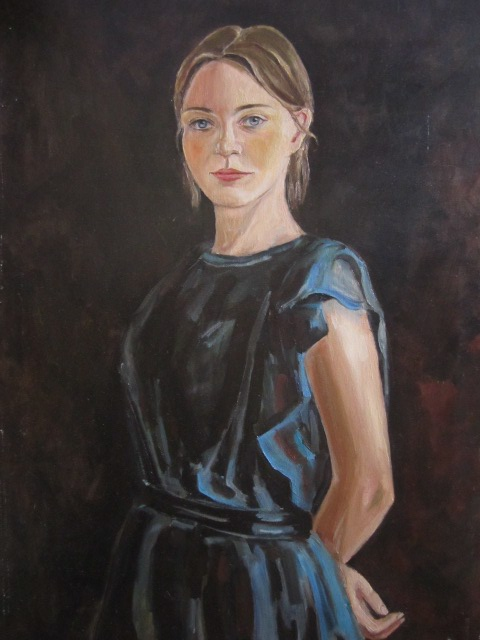

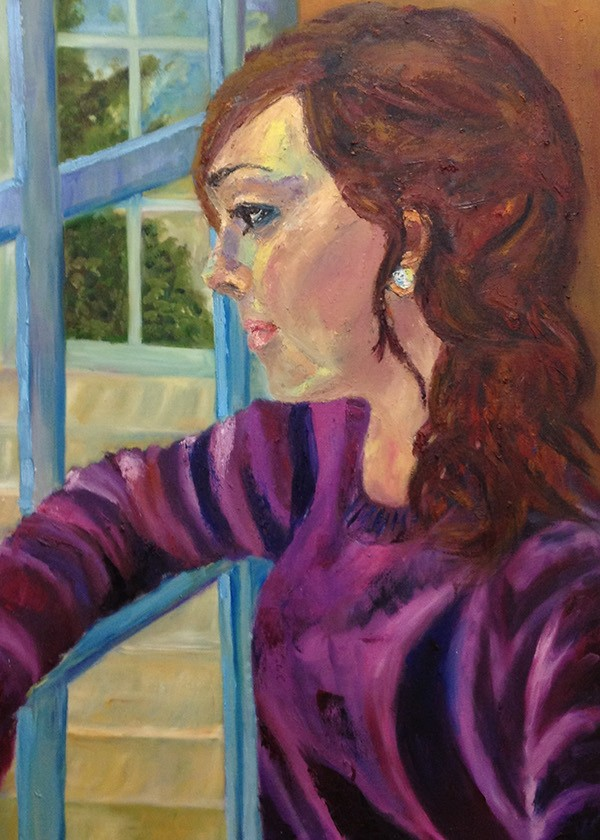

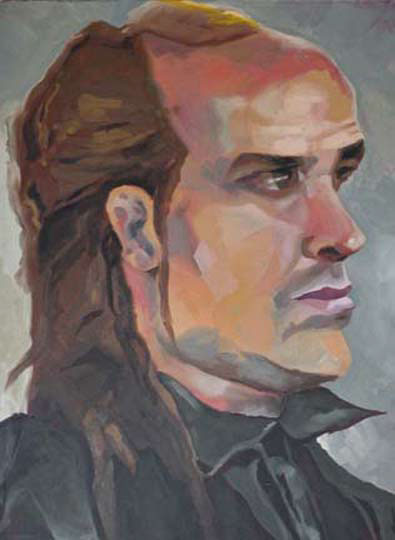

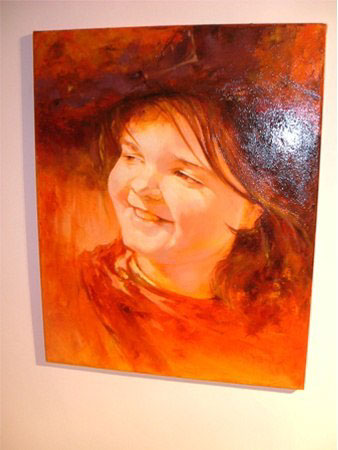

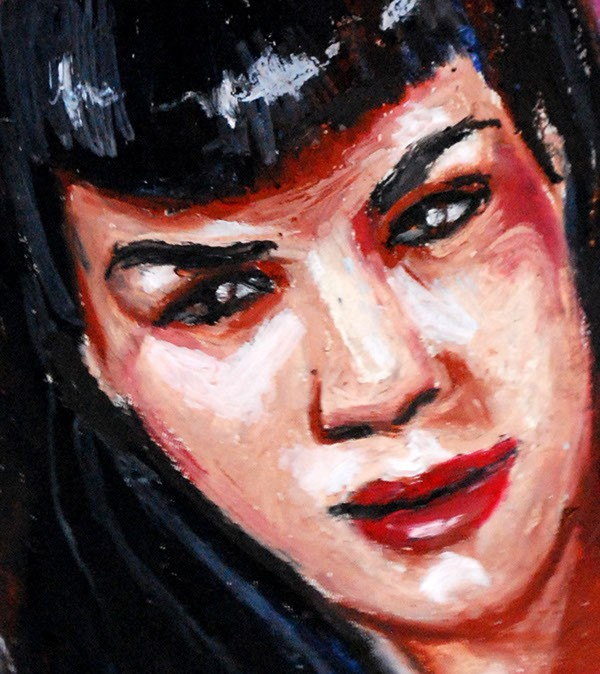

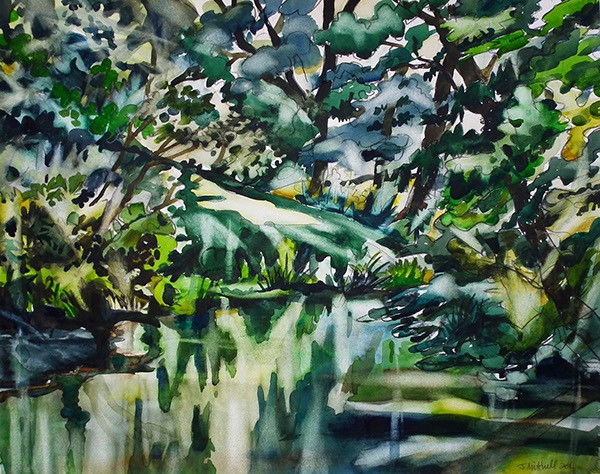

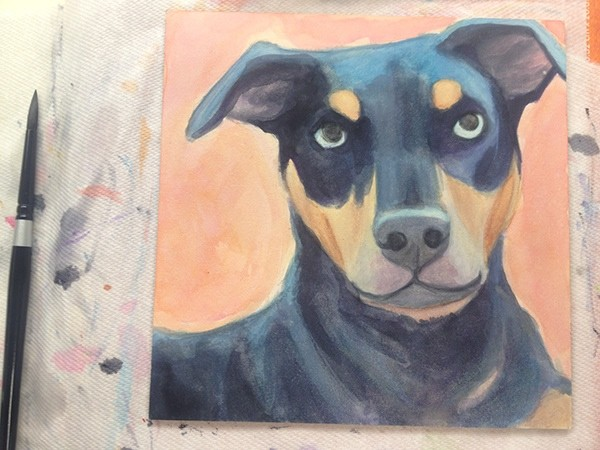

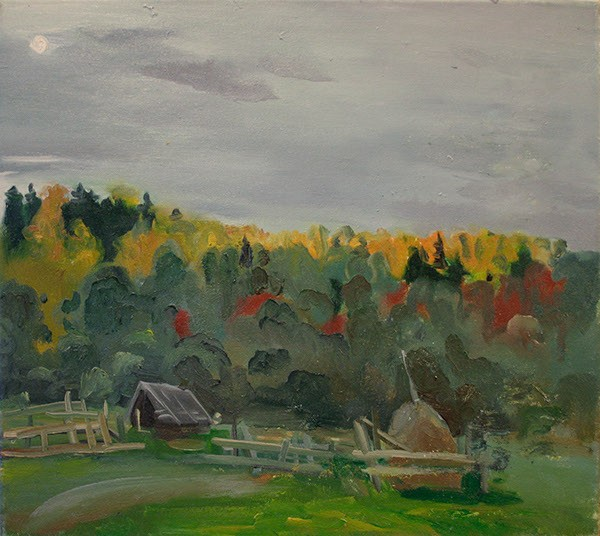

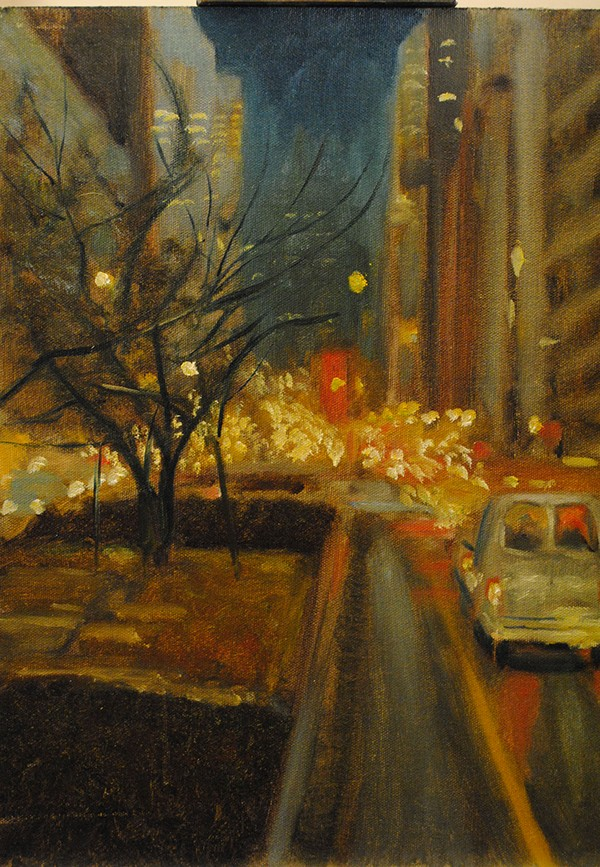

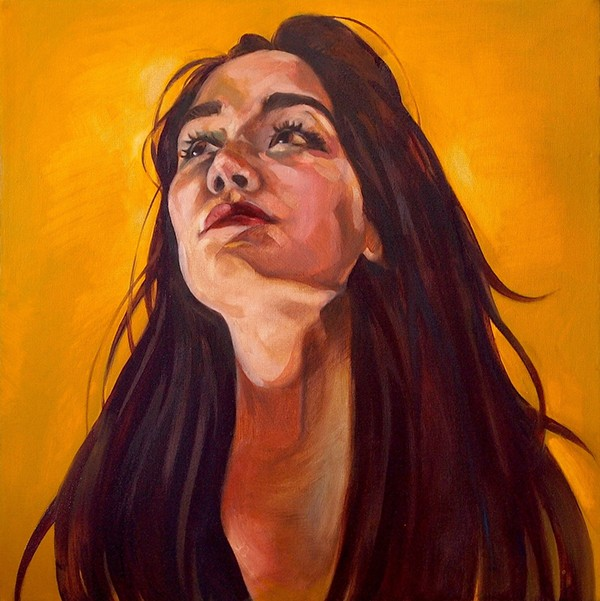

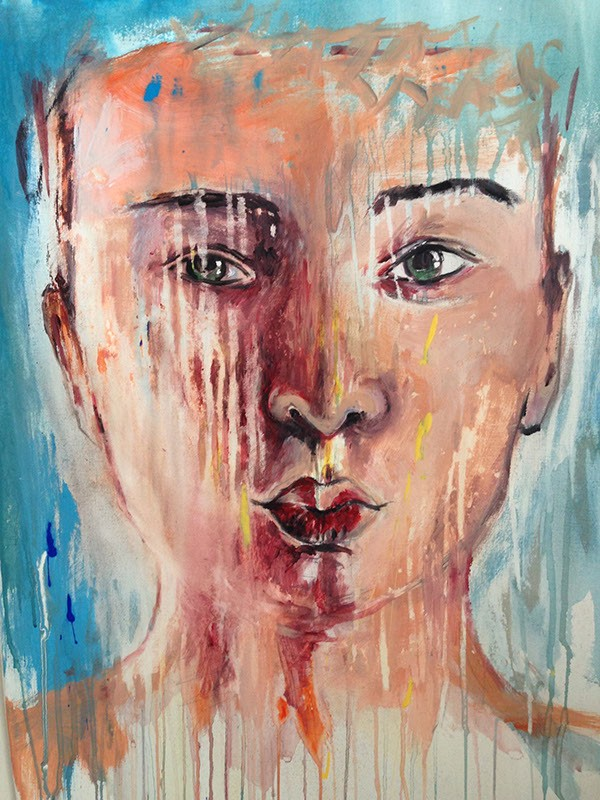

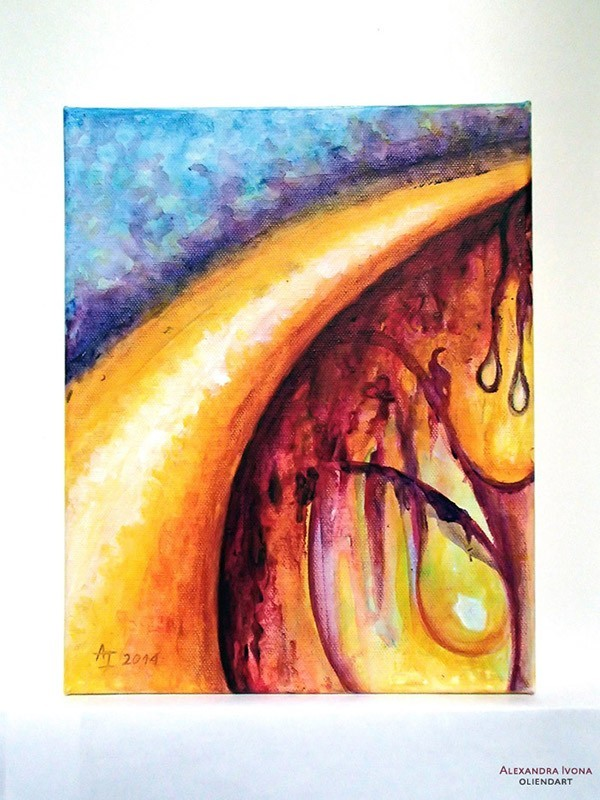

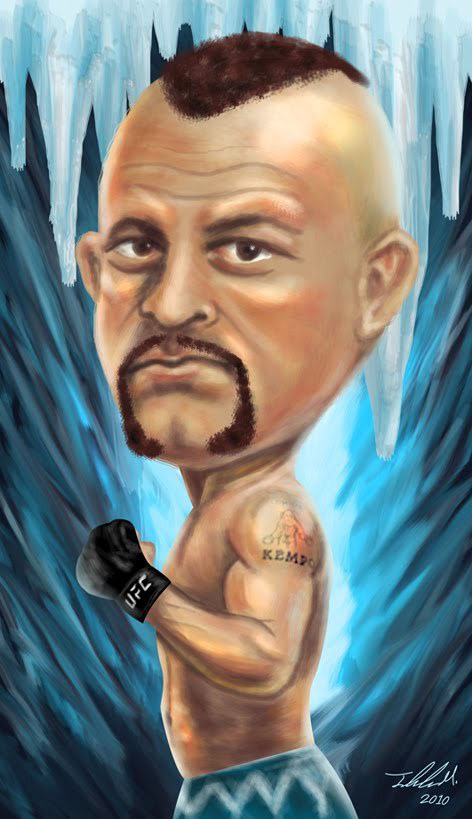

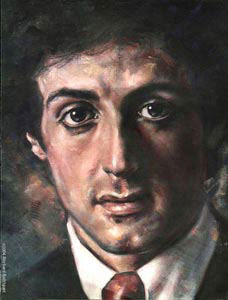

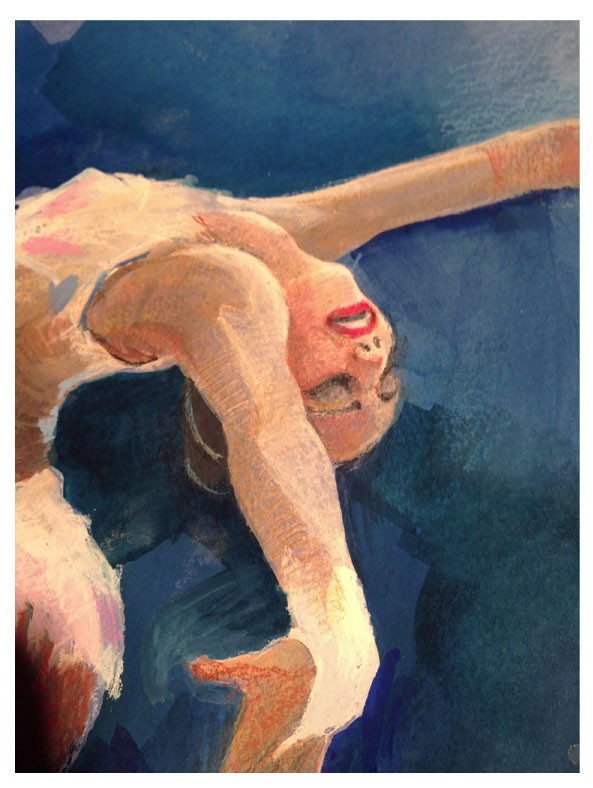

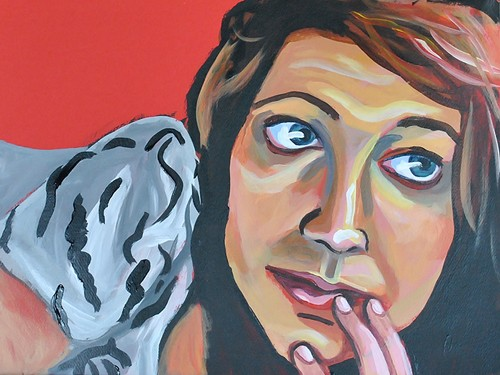

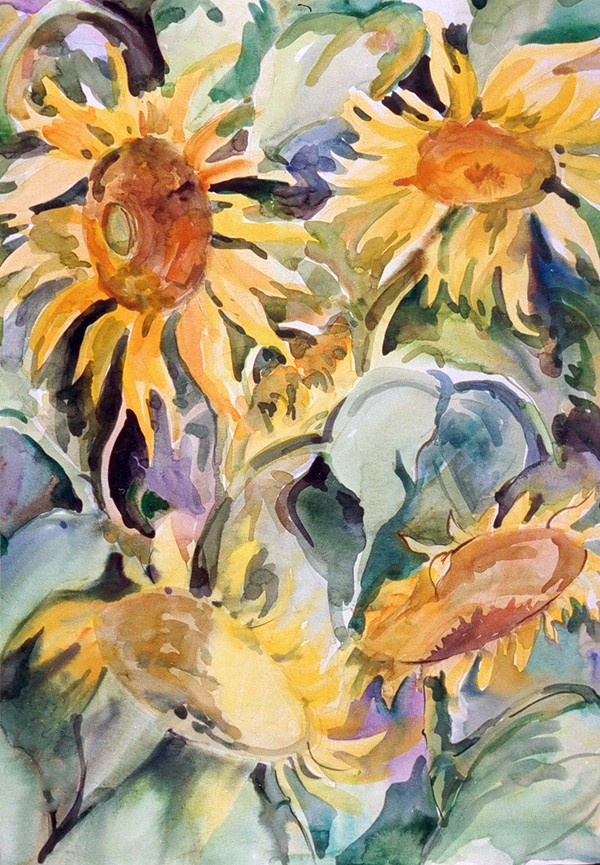

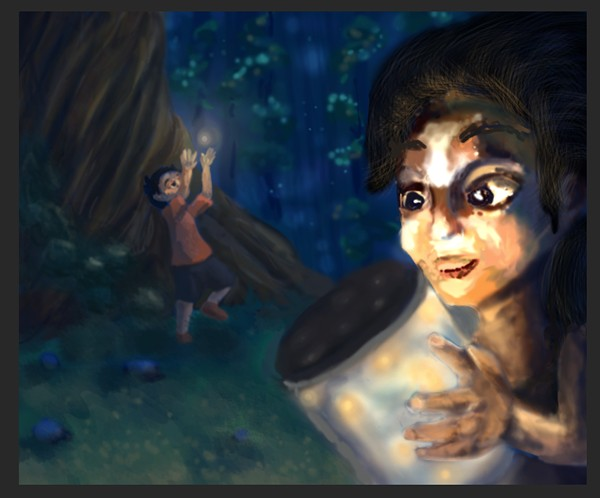

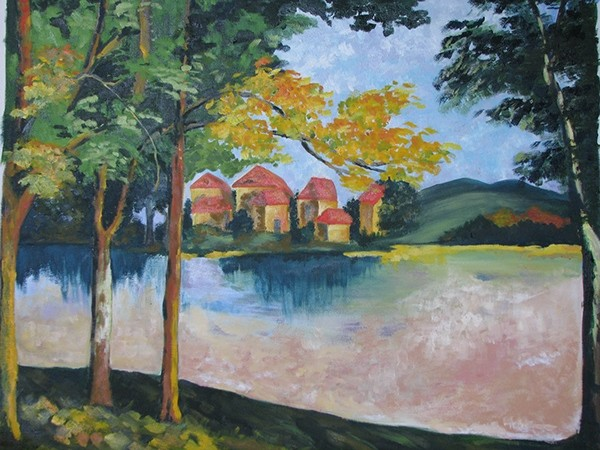

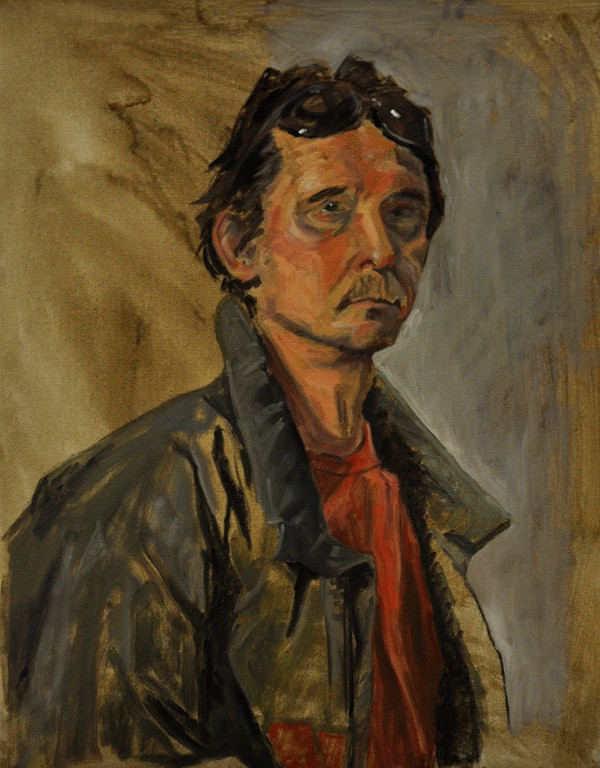

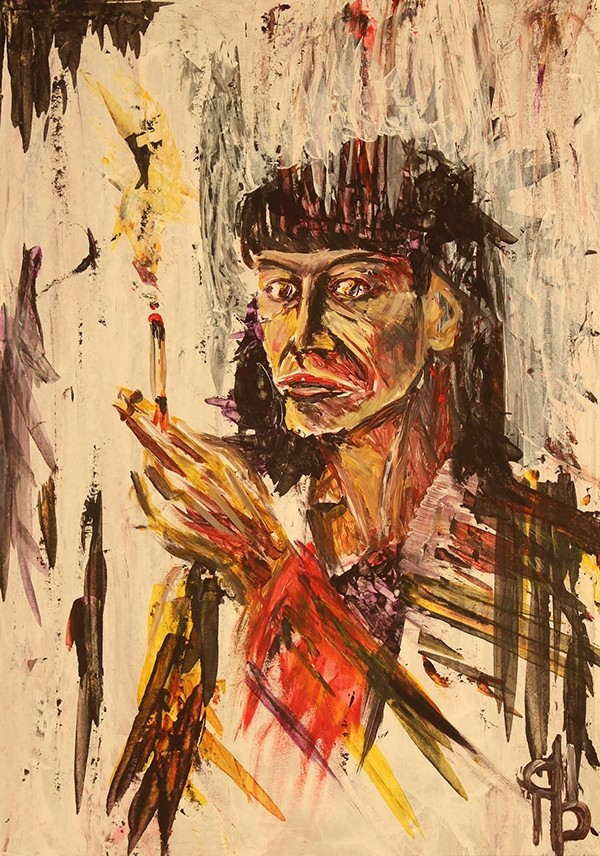

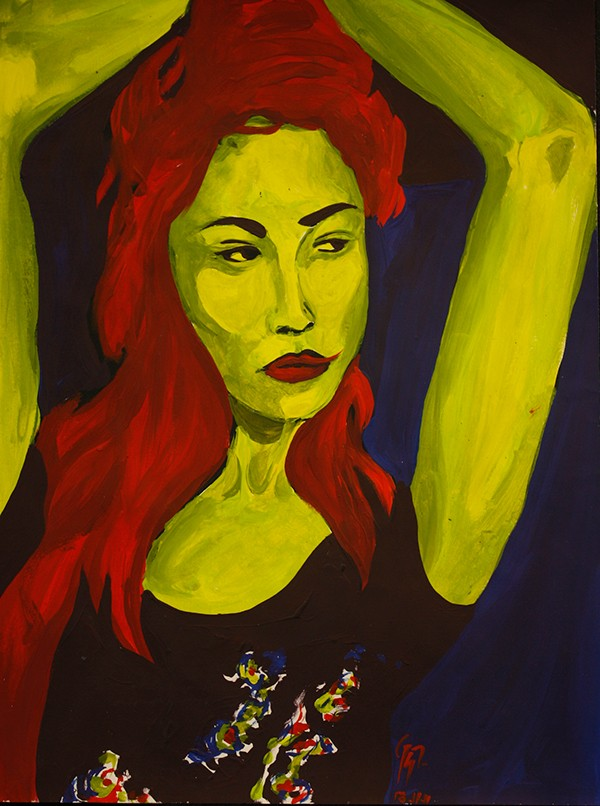

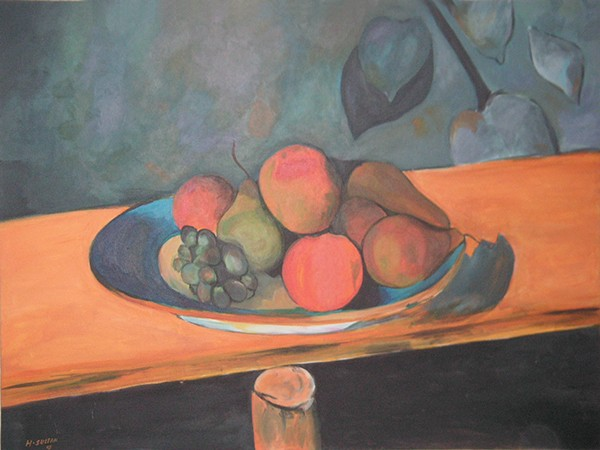

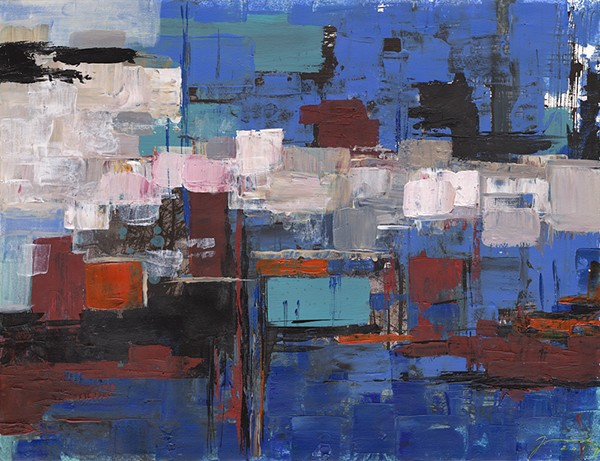

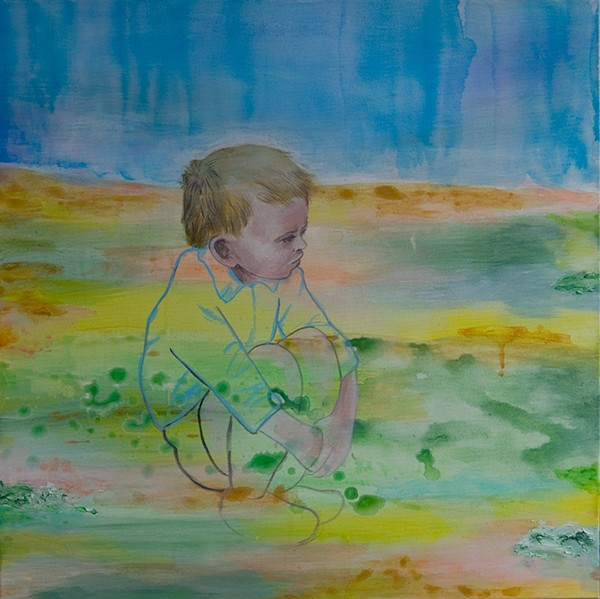

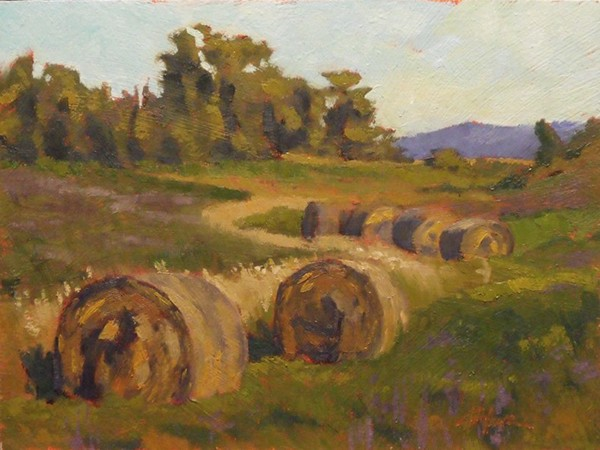

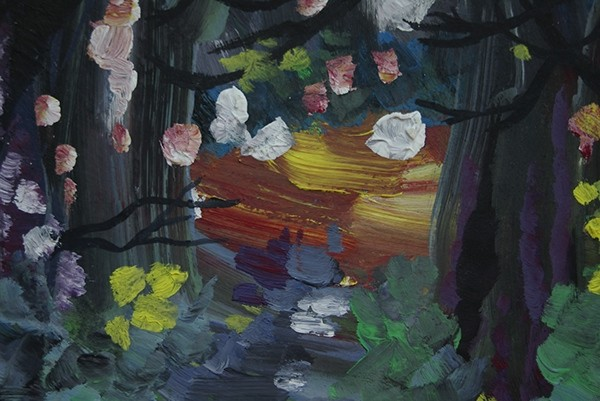

In [43]:
for mid in oilpaint_MIDs.mid.sample(30):
    if mid in OFFSETS:
        display(Image(data=get_imagebuf_from_module_id(mid), width=200,height=200, ))

In [ ]:
count = 0
!mkdir -p 'images/oilpaint'
while count < 5000:
    mid = np.random.choice(oilpaint_MIDs.mid)
    if mid in OFFSETS:
        with open("images/oilpaint/%d.jpg" % mid, "wb") as f:
            f.write(get_imagebuf_from_module_id(mid))